In [1]:
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/tmp/hour.csv")
df["dteday"] = df["dteday"] + " " + df["hr"].astype(str).str.zfill(2)
df["dteday"] = pd.to_datetime(df["dteday"], format="%Y-%m-%d %H")
df.rename(columns={"dteday": "ds", "cnt": "y"}, inplace=True)

train_df, test_df = train_test_split(df, test_size=0.1, shuffle=False)

In [3]:
model = Prophet()
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [4]:
model.params

{'k': array([[0.50689237]]),
 'm': array([[0.03408923]]),
 'delta': array([[ 5.02582378e-07,  2.64605351e-06,  2.95435127e-01,
          1.52715273e-01, -2.32081289e-07, -1.93790431e-01,
         -4.94930244e-01, -4.11039695e-01, -4.53787555e-02,
         -2.26097683e-07, -3.73155314e-06, -9.77926193e-04,
         -2.60990582e-01, -1.85307270e-03,  5.54594909e-09,
          1.16225581e-06,  7.09802732e-01,  5.62747717e-01,
          2.30751360e-01,  3.02654572e-07, -1.98753893e-01,
         -4.57112222e-01, -1.36749724e-06, -1.31670208e-01,
         -1.14118854e-01]]),
 'sigma_obs': array([[0.11418344]]),
 'beta': array([[ 0.00618474,  0.00558721, -0.00194474, -0.00315577,  0.00319994,
         -0.00116084, -0.1103152 , -0.1054184 , -0.03777214, -0.06275788,
          0.0300878 ,  0.03722264,  0.01926319,  0.01949743]]),
 'trend': array([[0.03408923, 0.03412138, 0.03415353, ..., 0.30861162, 0.30862099,
         0.30863036]])}

In [5]:
model = Prophet()
model.fit(train_df[["ds", "y"]])
model.params

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'k': array([[0.50689237]]),
 'm': array([[0.03408923]]),
 'delta': array([[ 5.02582378e-07,  2.64605351e-06,  2.95435127e-01,
          1.52715273e-01, -2.32081289e-07, -1.93790431e-01,
         -4.94930244e-01, -4.11039695e-01, -4.53787555e-02,
         -2.26097683e-07, -3.73155314e-06, -9.77926193e-04,
         -2.60990582e-01, -1.85307270e-03,  5.54594909e-09,
          1.16225581e-06,  7.09802732e-01,  5.62747717e-01,
          2.30751360e-01,  3.02654572e-07, -1.98753893e-01,
         -4.57112222e-01, -1.36749724e-06, -1.31670208e-01,
         -1.14118854e-01]]),
 'sigma_obs': array([[0.11418344]]),
 'beta': array([[ 0.00618474,  0.00558721, -0.00194474, -0.00315577,  0.00319994,
         -0.00116084, -0.1103152 , -0.1054184 , -0.03777214, -0.06275788,
          0.0300878 ,  0.03722264,  0.01926319,  0.01949743]]),
 'trend': array([[0.03408923, 0.03412138, 0.03415353, ..., 0.30861162, 0.30862099,
         0.30863036]])}

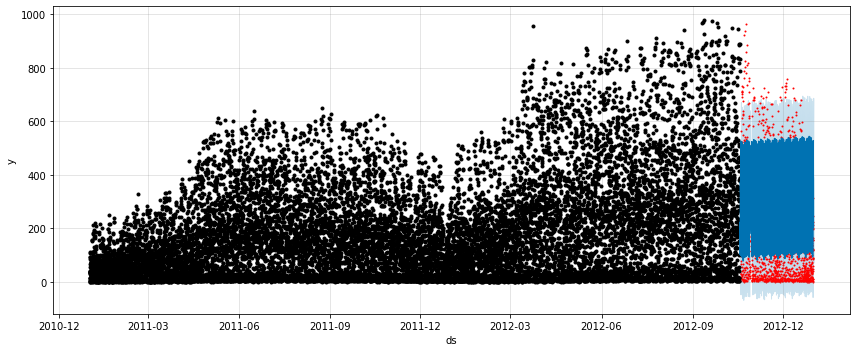

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
forecast = model.predict(test_df)
model.plot(forecast, ax=ax)
ax.scatter(test_df["ds"], test_df["y"], c='r', s=1)

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(forecast["yhat"].values, test_df["y"].values)
mse_basic = np.mean((test_df["y"].values - train_df["y"].values.mean())**2)
print(mse, mse_basic, 1 - mse / mse_basic)

30871.517528759174 35546.05120665194 0.13150641264529517


Try to interpret the following graphs:

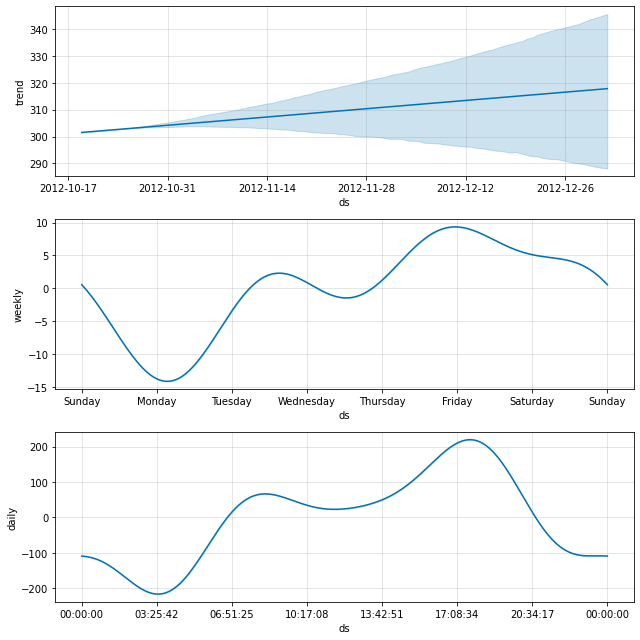

In [8]:
model.plot_components(forecast);

## Setting maximum and minimum + Adding more regressors

In [9]:
pd.options.mode.chained_assignment = None

In [8]:
train_df["cap"] = 2000
train_df["floor"] = 0
test_df["cap"] = 2000
test_df["floor"] = 0

model = Prophet()
for col in ["holiday", "temp"]:
    model.add_regressor(col)
model.fit(train_df)
model.params

/Users/sachinthaka/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sachinthaka/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sachinthaka/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

{'k': array([[0.19996492]]),
 'm': array([[0.10374864]]),
 'delta': array([[ 1.60572576e-06,  1.11601628e-05,  1.99269107e-01,
         -1.45421989e-07, -9.70862094e-07, -3.47682090e-01,
         -1.58919557e-01, -3.06301277e-06,  2.51360579e-06,
          2.55600694e-01,  3.98352648e-06,  2.92325671e-07,
         -2.98390621e-02, -2.27743037e-01, -4.75191154e-07,
          2.93368901e-06,  5.40381507e-01,  1.71677250e-01,
          7.37093483e-06,  3.13977392e-08, -1.88655100e-02,
         -6.71899544e-01,  1.98579800e-07, -5.06913849e-08,
          3.27365485e-01]]),
 'sigma_obs': array([[0.11302882]]),
 'beta': array([[ 0.00672192,  0.00305225, -0.00173425, -0.0031556 ,  0.00262927,
         -0.00082249, -0.09975072, -0.09801223, -0.03979162, -0.06440424,
          0.02964215,  0.03719587,  0.01950863,  0.01961654, -0.01287061,
          0.03814753]]),
 'trend': array([[0.10374864, 0.10376132, 0.10377401, ..., 0.29027734, 0.29029253,
         0.29030771]])}

In [9]:
forecast = model.predict(test_df)
mse = mean_squared_error(forecast["yhat"].values, test_df["y"].values)
mse_basic = np.mean((test_df["y"].values - train_df["y"].values.mean())**2)
print(mse, mse_basic, 1 - mse / mse_basic)

21894.290163728594 35546.05120665194 0.3840584419224775
